In [1]:
import numpy as np
import shap
from xai_visualization.util.load_data import feature_names
from xai_visualization.util.load_data import load_features
from xai_visualization.util.load_data import load_features
import tensorflow as tf
import pickle
import lime
import matplotlib.pyplot as plt

In [13]:
guy_features = load_features("../data/korpus_no_video/001_2016-03-17_Paris", 'novice')
model = tf.keras.models.load_model("../models/test_1.15")
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
def explain(model, samples):
    background_dataset =  guy_features[:1000]
    #explainer = shap.GradientExplainer(model, background_dataset)
    #explainer = shap.KernelExplainer(model, background_dataset) # Also not working
    explainer = shap.DeepExplainer(model, background_dataset) # Currently is not supported in TF2: https://github.com/slundberg/shap/issues/885#issuecomment-564778328
    shap_values = explainer.shap_values(samples)

    return shap_values


In [4]:
print(len(guy_features))

26601


## Experiment with SHAP

In [30]:
data_explain = guy_features[0:30]
shap_values = explain(model, data_explain)

[array([[ 5.88146746e-01,  6.22900903e-01,  2.34340932e-02,
         -2.64946848e-01, -1.17097087e-02,  1.00773528e-01,
          3.34681384e-02, -1.58500671e-02, -8.43364447e-02,
         -8.55033174e-02, -1.18397988e-01, -3.95787433e-02,
         -5.29145934e-02, -7.92576075e-02,  4.18951452e-01,
          5.72647667e-04, -1.84926271e-01,  8.82679671e-02]]),
 array([[-0.05661558, -0.28782639,  0.04254473, -0.53363991, -0.00606498,
          0.17098583,  0.22178146, -0.20028229, -0.19947015,  0.05473651,
         -0.0420519 , -0.22194009, -0.03087678, -0.25731996, -0.20348875,
          0.00115012, -0.49137631, -0.09240606]]),
 array([[-2.90586650e-01, -3.60064149e-01, -9.53221868e-04,
          8.98449868e-02,  5.05351927e-03, -3.43377031e-02,
         -3.88211175e-03, -3.19344597e-03,  2.87844688e-02,
          4.11661901e-02,  5.29951602e-02,  8.13271478e-03,
          2.32124440e-02,  9.04984958e-03, -1.25589594e-01,
          7.49769097e-05, -1.35889731e-03, -6.13195002e-02]]),
 array([[-0.22529934,  0.04237202, -0.067224  ,  0.79140061,  0.01182051,
         -0.26455963, -0.29178008,  0.25442499,  0.29186711, -0.01093994,
          0.12057737,  0.28433844,  0.07093975,  0.31956872, -0.07418194,
         -0.0019381 ,  0.71471477,  0.07065129]])]

In [23]:
classes = np.argmax(probability_model.predict(np.array(data_explain)), axis=1)

In [24]:
classes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
np.array(shap_values).shape

(4, 1, 18)

In [272]:
#np.array(shap_values).transpose(1,0,2)[,:,:].shape

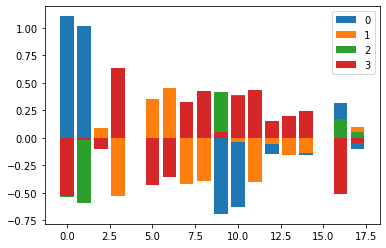

In [31]:
for i in range(4):
    data = np.array(shap_values)[i][29]
    plt.bar(range(18), data)
plt.legend(range(4))

In [279]:
#hap.summary_plot(
#    shap_values, data_explain, 
#    class_names=[str(i) for i in range(18)],
#    feature_names=feature_names
#)

In [277]:
#for samples in np.array_split(guy_features, len(guy_features)/30):
#    print(samples.shape)
#    shap_values = explain(model, np.array(samples))
#    shap.summary_plot(
#        shap_values, samples, 
#        class_names=[str(i) for i in range(18)],
#        feature_names=feature_names
#    )

## Experiment with LIME

In [247]:
explainer = lime.lime_tabular.LimeTabularExplainer(guy_features, feature_names=feature_names, discretize_continuous=False)

In [278]:
#exp = explainer.explain_instance(guy_features[0], probability_model.predict, top_labels=4,num_features=18)
#exp.show_in_notebook(show_table=True, show_all=True)

In [250]:
exp = explainer.explain_instance(guy_features[0], probability_model.predict, top_labels=4,num_features=18)

In [275]:
exp.predict_proba

array([0.02890471, 0.26961166, 0.6576622 , 0.04382139], dtype=float32)

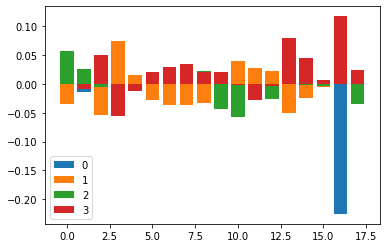

In [259]:
for i in range(4):
    explanations = np.array(exp.local_exp[i])
    indices = explanations[:,0].astype(int)
    explanations = explanations[:,1][np.argsort(indices)]

    plt.bar(range(18), explanations)
plt.legend(range(4))

In [249]:
#for sample in guy_features:
#    print("Predicting")
#    exp= explainer.explain_instance(sample, probability_model.predict, top_labels=4,num_features=18)
#    exp.show_in_notebook(show_table=True, show_all=True)